In [2]:
import numpy as np
from skimage.draw import polygon
import json
from collections import OrderedDict
from copy import deepcopy
import matplotlib.pyplot as plt
import pickle as pkl

## Build pixels coordinates from masks

In [4]:
with open("atlas_cleaned.json", mode="r") as f:
    paths = json.load(f)

In [7]:
pixels = {}
for poly in paths:
    if len(poly["path"])>0:
        rr, cc = polygon(*zip(*poly["path"]))
        pixels[poly["id"]] = set(zip(rr, cc))
    else:
        pixels[poly["id"]] = set()

In [8]:
len(pixels[1]) # Switzerland flag: 26*26 pixels == 676

676

In [9]:
with open("place_pixels.pkl", mode="wb") as f:
    pkl.dump(pixels, f)

In [10]:
with open("place_pixels.pkl", mode="rb") as f:
    pixels = pkl.load(f)

## Remove intersections from biggers masks (maybe not a good idea)

In [89]:
by_area = {}
for idx, pixs in pixels.items():
    l = len(pixs)
    if l not in by_area:
        by_area[l] = set()
    by_area[l].add(idx)

In [ ]:
true_pixels = {}
areas = list(sorted(by_areas.keys()))[1:]
for i, area in enumerate(areas):
    for cur_idx in by_area[area]:
        pixs = deepcopy(pixels[cur_idx])
        for j in areas[:i]:
            for idx in by_area[j]:
                pixs = pixs - pixels[idx]
        true_pixels[cur_idx] = pixs

In [135]:
with open("place_pixels_difference.pkl", mode="wb") as f:
    pkl.dump(true_pixels, f)

In [12]:
with open("place_pixels_difference.pkl", mode="rb") as f:
    true_pixels = pkl.load(f)

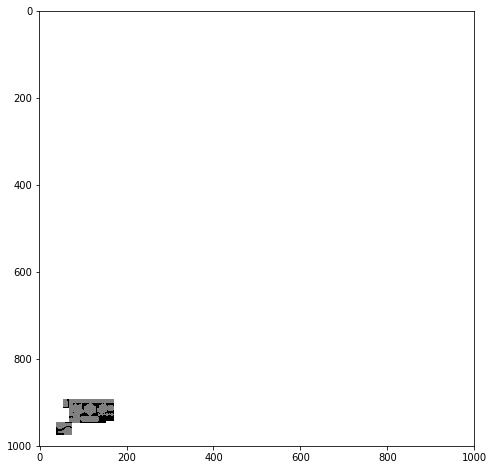

In [13]:
atlas_id = 130
mask = np.ones((1000, 1000))
mask[tuple(zip(*pixels[atlas_id]))] = 0.5
mask[tuple(zip(*true_pixels[atlas_id]))] = 0
plt.figure(figsize=(8,8))
plt.imshow(mask.T, cmap="gray")

## Get last users ids

(1493, 1473)